<a href="https://colab.research.google.com/github/carmenfontenla/AA_PRACTICA1_GRUPO_N-GRUPO/blob/main/AA_PRACTICA1_CARMENFONTENLACAMBON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PRÁCTICA 1 APRENDIZAJE AUTOMÁTICO



Carmen Fontenla Cambón

**INTRODUCCIÓN**

Crea un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.  
Para ello tendréis que crear un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST, precargado en Keras y muy parecido al que vimos en clase de reconocimiento de números. 
Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando (www.zalando.com), una tienda de moda online alemana especializada en ventas de ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles).
Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes .

Lo primero que vamos a hacer es importar las librerías necesarias, siendo estas superiores a la versión 2.0

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

print(tf.__version__)

2.8.2


Ahora vamos a importar la base de datos de las prendas de ropa de mnist separando los datos de entrenamiento y prueba.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Como se puede ver tenemos dos conjuntos de datos para entrenamiento y otros dos para prueba, imágenes y labels. En "imágenes" están guardadas matrices de 28x28 píxeles y de intensidad entre 0 y 255 enteros, mientras que en "labels" me dice el tipo de prenda que es. Vamos a imprimir uno de cada tipo para ver el formato.

In [ ]:
# Comprobamos el tamaño de nuestro conjunto de datos para ver que no haya anomalías
print("train_images.shape:",train_images.shape)
print("len(train_labels:",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


Como podemos ver, train_images y train_labels tienen el mismo número de datos (60000), mientras que el test_images y test_labels tienen 10000, es decir, tienen el tamaño correcto.

In [ ]:
train_labels[25673]

4

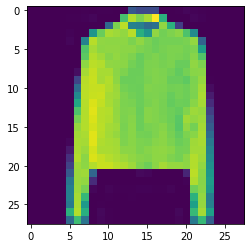

In [ ]:
plt.figure()
plt.imshow(train_images[25673])

Vamos a definir las etiquetas para saber de qué tipo de prenda se trata.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Según la etiqueta, la imagen se trata de un abrigo ('coat'), sin embargo, a la hora de ver la imagen representa un desafío determinar el tipo de prenda que es ya que a primera vista se confundió con una camiseta. Por eso, el objetivo de esta práctica es crear un modelo de redes neuronales que me ayude a clasificar con la mayor exactitud posible.

**PREPROCESAMIENTO**

Una vez etiquetadas las prendas, vamos a normalizar las imágenes con el objetivo de que la intensidad esté entre 0 y 1.

In [ ]:
# Cambiamos el tipo de datos de enteros a flotantes (decimales) para así alcanzar una mayor precisión. Si no lo hiciéramos, solo tendríamos 0 y 1
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32')
# Ahora dividimos entre el valor más alto, para normalizar los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

Ahora vamos a observar una parte del conjunto de datos

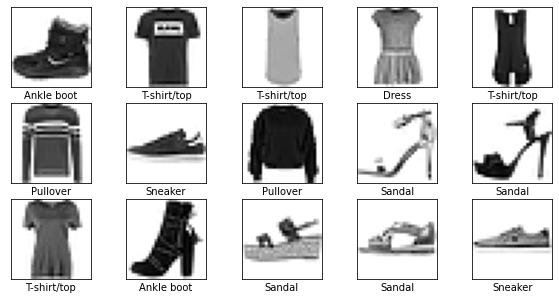

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Como podemos ver, normalizar los datos derivó en imágenes en blanco y negro y además podemos formular la siguiente hipótesis: 
Si la prenda de ropa es 'T-shirt/top' y 'dress' o incluso 'coat' y 'Pullover', entonces nuestra red neuronal tenderá a confundir los productos unos con otros si no se escogen bien tanto el optimizador como el activador.

**CREACIÓN DE MODELOS**

In [ ]:
modelo1 = Sequential()
modelo1.add(Flatten(input_shape=(28, 28)))
modelo1.add(Dense(10, activation = 'relu'))
modelo1.add(Dense(10, activation = 'softmax'))
print('Modelo1')
print(modelo1.summary())
print('\n')

modelo2 = Sequential()
modelo2.add(Flatten(input_shape=(28, 28)))
modelo2.add(Dense(10, activation = 'relu'))
modelo2.add(Dense(10, activation = 'softmax'))
print('Modelo2')
print(modelo2.summary())
print('\n')

modelo3 = Sequential()
modelo3.add(Flatten(input_shape=(28, 28)))
modelo3.add(Dense(10, activation = 'sigmoid'))
modelo3.add(Dense(10, activation = 'softmax'))
print('Modelo3')
print(modelo3.summary())
print('\n')

modelo4 = Sequential()
modelo4.add(Flatten(input_shape = (28, 28)))
modelo4.add(Dense(10, activation = 'sigmoid'))
modelo4.add(Dense(10, activation = 'softmax'))
print('Modelo4')
print(modelo4.summary())
print('\n')

modelo5 = Sequential()
modelo5.add(Flatten(input_shape=(28, 28)))
modelo5.add(Dense(512, activation = 'relu'))
modelo5.add(Dense(10, activation = 'softmax'))
print('Modelo5')
print(modelo5.summary())
print('\n')

modelo6 = Sequential()
modelo6.add(Flatten(input_shape=(28, 28)))
modelo6.add(Dense(512, activation = 'relu'))
modelo6.add(Dense(10, activation = 'softmax'))
print('Modelo6')
print(modelo6.summary())
print('\n')

modelo7 = Sequential()
modelo7.add(Flatten(input_shape=(28, 28)))
modelo7.add(Dense(512, activation = 'sigmoid'))
modelo7.add(Dense(10, activation = 'softmax'))
print('Modelo7')
print(modelo7.summary())
print('\n')

modelo8 = Sequential()
modelo8.add(Flatten(input_shape=(28, 28)))
modelo8.add(Dense(512, activation = 'sigmoid'))
modelo8.add(Dense(10, activation = 'softmax'))
print('Modelo8')
print(modelo8.summary())
print('\n')

Modelo1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
None


Modelo2
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 

El resumen de cada modelo (model.summary()) nos indica la construcción de la red neuronal. Como primera linea vemos que todos los modelos tienen la capa 'Flatten', la cual nos aplana la imagen (pasamos de una matriz de 28x28, a uno de 1x784 pixeles), lo que significa que tiene parámetro nulo (0). 
La siguiente capa indica el número de neuronas que se utiliza para entrenar el modelo. En nuestro caso pueden ser 10 o 512, estas generan 784 por el número de neuronas, ya que es como si entrenaran pixel por pixel.
La última capa tiene que ver con la salida, la cual nos dice que va a ser un vector de 10 entradas, por eso se dice que es 'Softmax'.

**COMPILACIÓN DE MODELOS**

In [ ]:
modelo1.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
modelo2.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
modelo3.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
modelo4.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
modelo5.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
modelo6.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
modelo7.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
modelo8.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

Para entender el código anterior hay que tener claros los siguientes conceptos:
* Loss function: Indica cómo de exacto es el modelo durante el entrenamiento. El objetivo es minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* Optimizer: Esto es cómo el modelo se actualiza basándose en el set de datos y la funcion de pérdida.
* Metrics: Se usan para monitorear los pasos de entrenamiento y de pruebas.

**ENTRENAMIENTO**

In [ ]:
print('Modelo1')
modelo1.fit(train_images, train_labels, epochs = 5)

print('Modelo2')
modelo2.fit(train_images, train_labels, epochs = 5)
print('Modelo3')
modelo3.fit(train_images, train_labels, epochs = 5)
print('Modelo4')
modelo4.fit(train_images, train_labels, epochs = 5)
print('Modelo5')
modelo5.fit(train_images, train_labels, epochs = 5)
print('Modelo6')
modelo6.fit(train_images, train_labels, epochs = 5)
print('Modelo7')
modelo7.fit(train_images, train_labels, epochs = 5)
print('Modelo8')
modelo8.fit(train_images, train_labels, epochs = 5)


Modelo1
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0102 - accuracy: 0.6578
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5651 - accuracy: 0.8077
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5055 - accuracy: 0.8263
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4789 - accuracy: 0.8346
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4625 - accuracy: 0.8400
Modelo2
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6371 - accuracy: 0.7862
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4589 - accuracy: 0.8427
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4281 - accuracy: 0.8503
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4128 - accuracy: 0.8572
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 

Como podemos comprobar, la exactitud es buena (0'7 - 0'89 aproximadamente). A partir de estos datos podemos decir que se aprueba la hipótesis planteada anteriormente, en la que suponíamos que al modelo le iba a costar identificar ciertas prendas y por tanto su exactitud no es el 100%. Es muy interesante ver que en cada epoch, independientemente del modelo, la exactitud aumenta. Un claro ejemplo de esta situación en la vida cotidiana sería un niño que aprende a sumar, ya que la primera vez le va a costar, pero cuanto más practique, mejor lo va a hacer, entonces cada epoch representa a la red neuronal entrenando o practicando.

In [ ]:
perdida = list()
exactitud = list()
perdida.append(modelo1.evaluate(test_images, test_labels)[0])
perdida.append(modelo2.evaluate(test_images, test_labels)[0])
perdida.append(modelo3.evaluate(test_images, test_labels)[0])
perdida.append(modelo4.evaluate(test_images, test_labels)[0])
perdida.append(modelo5.evaluate(test_images, test_labels)[0])
perdida.append(modelo6.evaluate(test_images, test_labels)[0])
perdida.append(modelo7.evaluate(test_images, test_labels)[0])
perdida.append(modelo8.evaluate(test_images, test_labels)[0])
exactitud.append(modelo1.evaluate(test_images, test_labels)[1])
exactitud.append(modelo2.evaluate(test_images, test_labels)[1])
exactitud.append(modelo3.evaluate(test_images, test_labels)[1])
exactitud.append(modelo4.evaluate(test_images, test_labels)[1])
exactitud.append(modelo5.evaluate(test_images, test_labels)[1])
exactitud.append(modelo6.evaluate(test_images, test_labels)[1])
exactitud.append(modelo7.evaluate(test_images, test_labels)[1])
exactitud.append(modelo8.evaluate(test_images, test_labels)[1])
print(perdida)
print(exactitud)

313/313 [==============================] - 1s 3ms/step - loss: 0.3885 - accuracy: 0.8688
[0.4887949824333191, 0.45636236667633057, 0.7723450064659119, 0.4567321836948395, 0.438991904258728, 0.40966489911079407, 0.5599567294120789, 0.38846534490585327]
[0.8289999961853027, 0.84170001745224, 0.7422999739646912, 0.8360999822616577, 0.8461999893188477, 0.8677999973297119, 0.8001000285148621, 0.8687999844551086]


Text(0.5, 1.0, 'Evaluación y comparación de los Modelos')

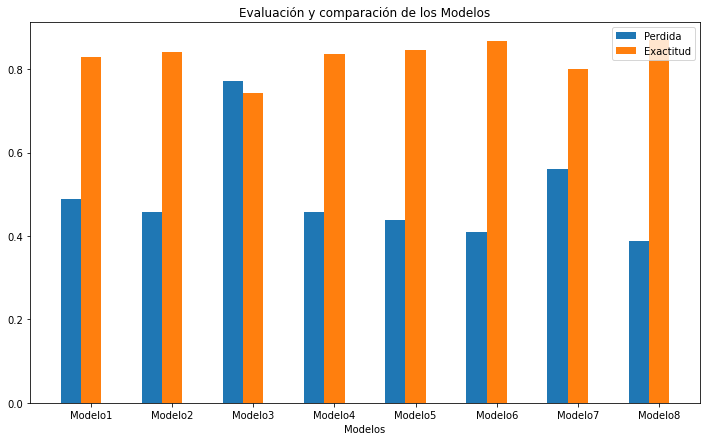

In [ ]:
plt.figure(figsize=(12, 7))
numgrupo = 8
indice_barras = np.arange(numgrupo)
ancho_barras = 0.25
plt.bar(indice_barras, perdida, width = ancho_barras, label = 'Perdida')
plt.bar(indice_barras + ancho_barras, exactitud, width = ancho_barras, label = 'Exactitud')
plt.legend(loc = 'best')
plt.xticks(indice_barras + ancho_barras, ('Modelo1', 'Modelo2', 'Modelo3', 'Modelo4', 'Modelo5', 'Modelo6', 'Modelo7', 'Modelo8'))
plt.xlabel('Modelos')
plt.title('Evaluación y comparación de los Modelos')

Como podemos ver en esta gráfica de comparación de pérdida y exactitud de cada modelo, el peor es el Modelo3, ya que tiene aproximadamente la misma pérdida que exactitud, mientras que los Modelos 2 y 8, tienen una exactitud alta y una pérdida relativamente pequeña.

In [ ]:
#Cambiamos el tamaño de las imagenes (28x28) para que pueda entrar al modelo
test_images_prueba = test_images.reshape(10000, 784)

In [ ]:
prediccion1 = modelo1.predict(test_images)
print('Segun el Modelo 1, la imagen es: ', class_names[np.argmax(prediccion1[5])])
prediccion2 = modelo2.predict(test_images)
print('Segun el Modelo 2, la imagen es: ', class_names[np.argmax(prediccion2[5])])
prediccion3 = modelo3.predict(test_images)
print('Segun el Modelo 3, la imagen es: ', class_names[np.argmax(prediccion3[5])])
prediccion4 = modelo4.predict(test_images)
print('Segun el Modelo 4, la imagen es: ', class_names[np.argmax(prediccion4[5])])
prediccion5 = modelo5.predict(test_images)
print('Segun el Modelo 5, la imagen es: ', class_names[np.argmax(prediccion5[5])])
prediccion6 = modelo6.predict(test_images)
print('Segun el Modelo 6, la imagen es: ', class_names[np.argmax(prediccion6[5])])
prediccion7 = modelo7.predict(test_images)
print('Segun el Modelo 7, la imagen es: ', class_names[np.argmax(prediccion7[5])])
prediccion8 = modelo8.predict(test_images)
print('Segun el Modelo 8, la imagen es: ', class_names[np.argmax(prediccion8[5])])

print('Según la base de datos, la imagen es: ', class_names[test_labels[5]])

Segun el Modelo 1, la imagen es:  Trouser
Segun el Modelo 2, la imagen es:  Trouser
Segun el Modelo 3, la imagen es:  Trouser
Segun el Modelo 4, la imagen es:  Trouser
Segun el Modelo 5, la imagen es:  Trouser
Segun el Modelo 6, la imagen es:  Trouser
Segun el Modelo 7, la imagen es:  Trouser
Segun el Modelo 8, la imagen es:  Trouser
Según la base de datos, la imagen es:  Trouser


Como podemos ver, los modelos predicen bien la figura 5, que es un 'trouser' (pantalón).

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'orange'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('orange')
  thisplot[true_label].set_color('blue')

Las etiquetas de predicción correcta las pintaremos de azul y las de predicción incorrecta de naranja.

----------------------------------------------------------
PREDICCIONES MODELO  1  FIGURA  5


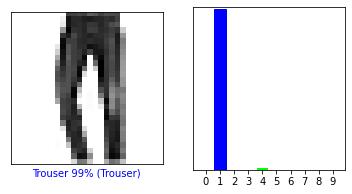




----------------------------------------------------------
PREDICCIONES MODELO  2  FIGURA  5


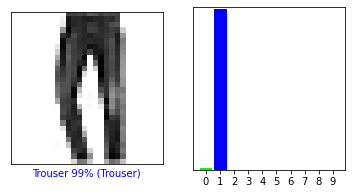




----------------------------------------------------------
PREDICCIONES MODELO  3  FIGURA  5


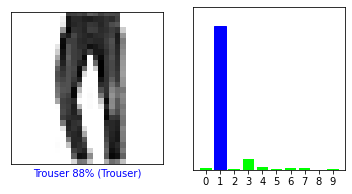




----------------------------------------------------------
PREDICCIONES MODELO  4  FIGURA  5


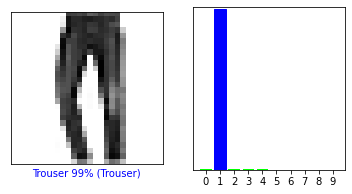




----------------------------------------------------------
PREDICCIONES MODELO  5  FIGURA  5


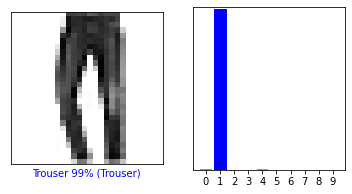




----------------------------------------------------------
PREDICCIONES MODELO  6  FIGURA  5


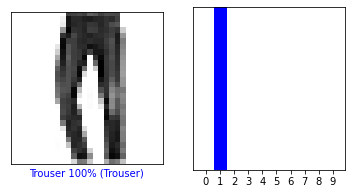




----------------------------------------------------------
PREDICCIONES MODELO  7  FIGURA  5


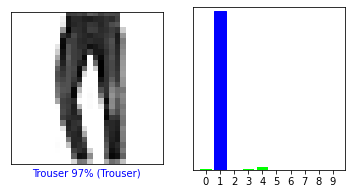




----------------------------------------------------------
PREDICCIONES MODELO  8  FIGURA  5


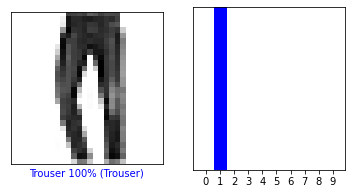

In [ ]:
casos = [prediccion1, prediccion2, prediccion3, prediccion4, prediccion5, prediccion6, prediccion7, prediccion8]
lst = np.array(casos)
def prediccion_un_caso(caso_concreto):
  i = 1 
  for caso in casos:
    print("----------------------------------------------------------")
    print("PREDICCIONES MODELO ", i, " FIGURA ", caso_concreto)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(caso_concreto, caso[caso_concreto], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(caso_concreto, caso[caso_concreto],  test_labels)
    plt.show()
    print("\n\n")
    i = i + 1

prediccion_un_caso(5)

En las imagenes anteriores podemos observar que para cada modelo, la probabilidad de que prediga 1, es decir, Trouser, va del 90 al 100%. En particular véase el Modelo 3, cuya gráfica muestra que la probabilidad de que prediga por ejemplo 3, es mayor de lo que debería, por eso el porcentaje de acierto es del 83%. Esto concuerda con la gráfica que evaluaba el modelo, es decir, que el 3 era el peor modelo.

A continuación haremos la predicción para las 10 primeras imágenes usando los distintos modelos. El objetivo de realizar esto es comparar cómo se comportan los modelos con distintos tipos de prendas.

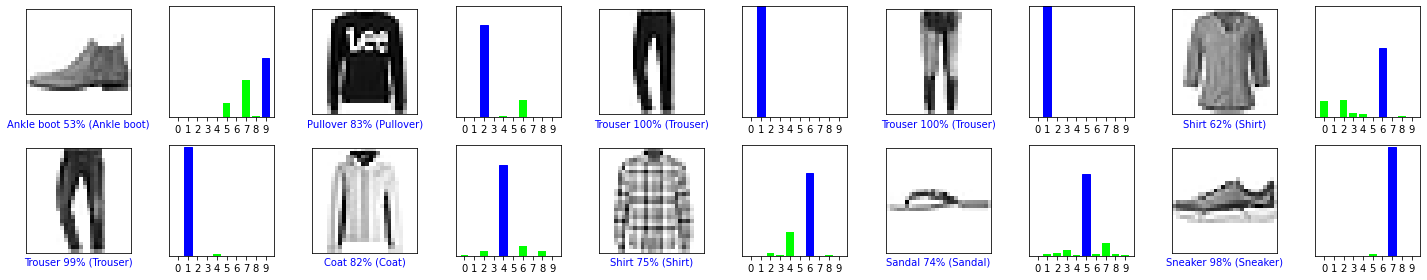

In [ ]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediccion1[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediccion1[i], test_labels)
plt.tight_layout()
plt.show()


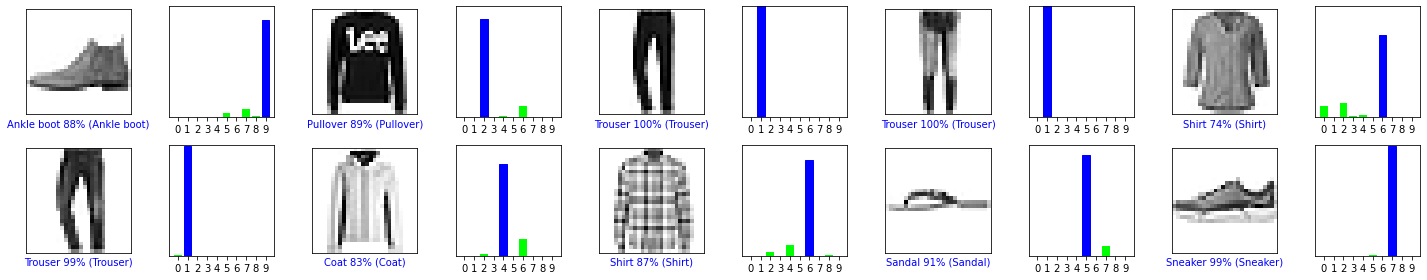

In [ ]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediccion2[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediccion2[i], test_labels)
plt.tight_layout()
plt.show()

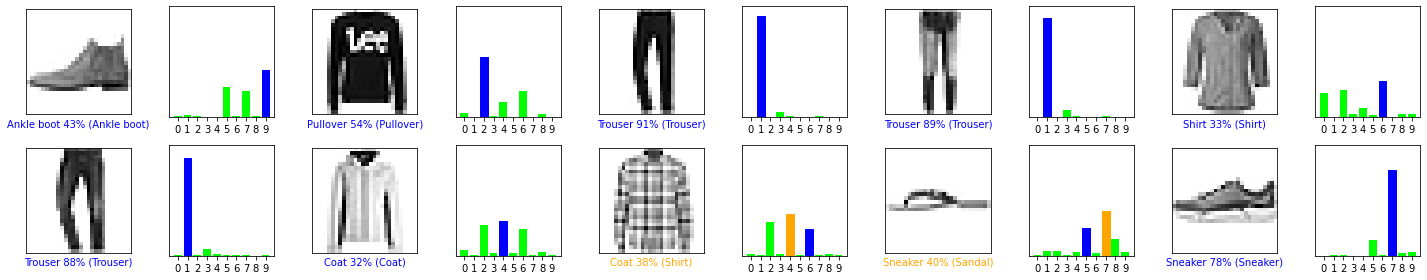

In [ ]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediccion3[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediccion3[i], test_labels)
plt.tight_layout()
plt.show()

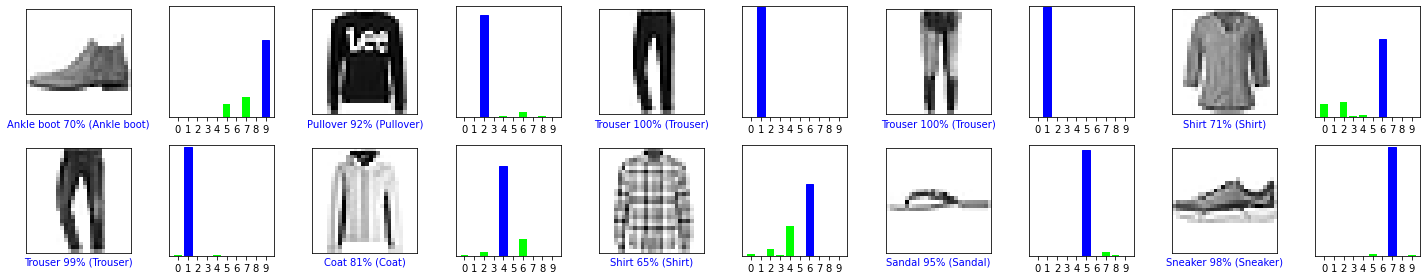

In [ ]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediccion4[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediccion4[i], test_labels)
plt.tight_layout()
plt.show()

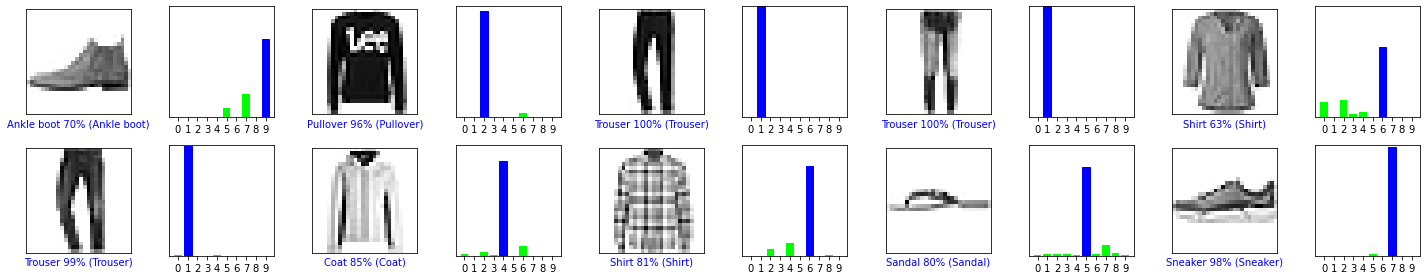

In [ ]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediccion5[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediccion5[i], test_labels)
plt.tight_layout()
plt.show()

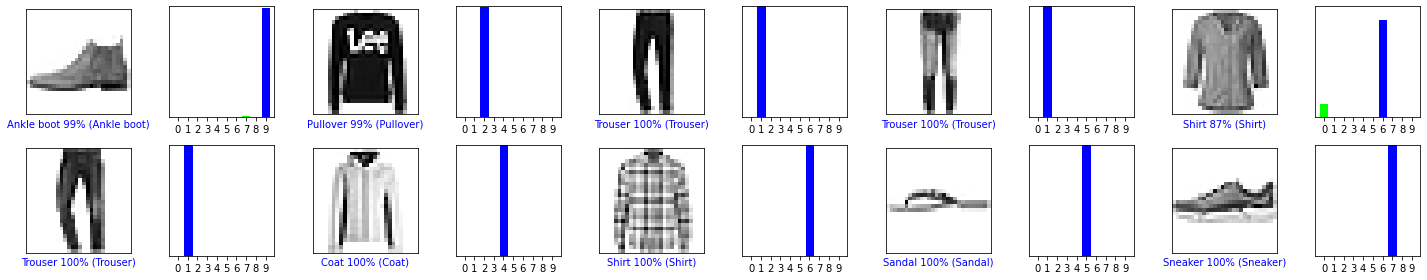

In [ ]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediccion6[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediccion6[i], test_labels)
plt.tight_layout()
plt.show()

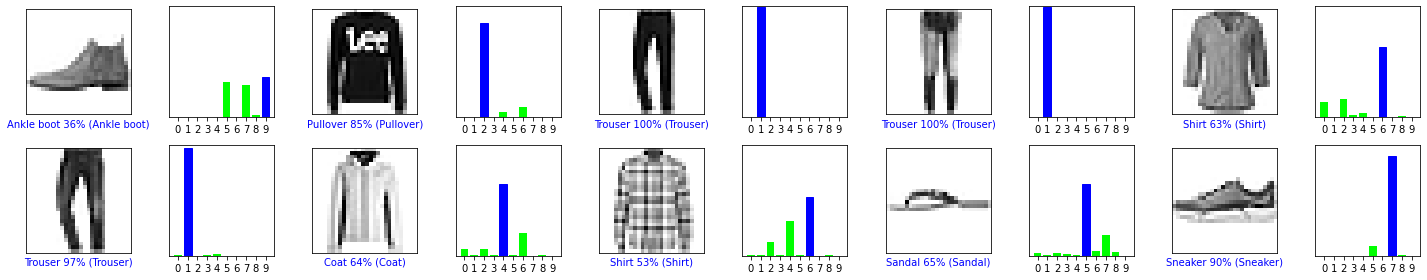

In [ ]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediccion7[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediccion7[i], test_labels)
plt.tight_layout()
plt.show()

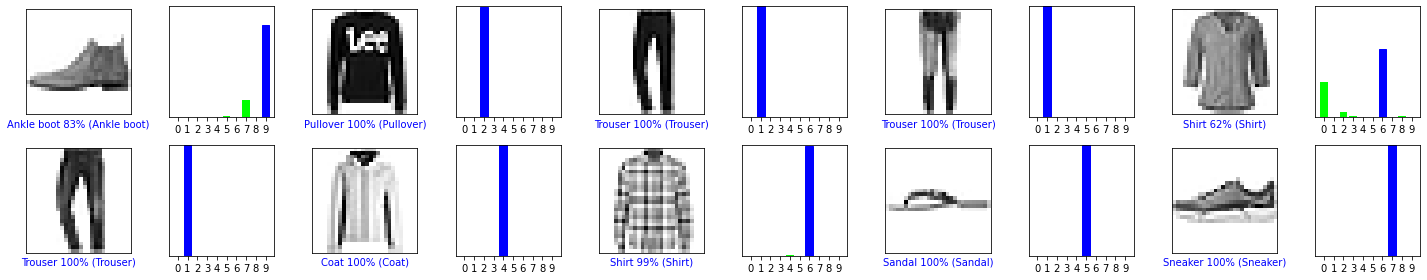

In [ ]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediccion8[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediccion8[i], test_labels)
plt.tight_layout()
plt.show()

Como podemos observar, las predicciones hechas con el modelo 3 pueden considerarse las peores, ya que les cuesta clasificar correctamente casi todas las prendas de ropa. Por otro lado, los modelos 6 y 8 son los mejores, puesto  que, por el contrario, hacen casi todas las clasificaciones de manera adecuada. Vemos que en general, todos los modelos tienen problemas con el Ankle boot, Shirt y el Coat. Esto se debe a que, por la baja resolución de la imagen, no es capaz de distinguir bien las prendas entre sí. 

MEJORA DEL MODELO 3

In [ ]:
modelo31 = Sequential()
modelo31.add(Flatten(input_shape=(28, 28)))
modelo31.add(Dense(10, activation = 'sigmoid'))
modelo31.add(Dense(10, activation = 'softmax'))
print('Modelo31')
print(modelo31.summary())
print('\n')

Modelo31
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
None




In [ ]:
modelo31.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
modelo31.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0121 - accuracy: 0.7267
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5733 - accuracy: 0.8087
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4858 - accuracy: 0.8375
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4472 - accuracy: 0.8464
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4277 - accuracy: 0.8510


In [ ]:
#Calculamos la pérdida y exactitud del modelo 3 mejorado
modelo31.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.4614 - accuracy: 0.8413


[0.4613562524318695, 0.8413000106811523]

Si comparamos los resultados de la exactitud del modelo 3 (0'74) con los del modelo 3 mejorado (0'84), podemos ver que aumenta un 10%. Vamos a comprobarlo volviendo a realizar las predicciones de este nuevo modelo.

In [ ]:
prediccion31 = modelo31.predict(test_images)

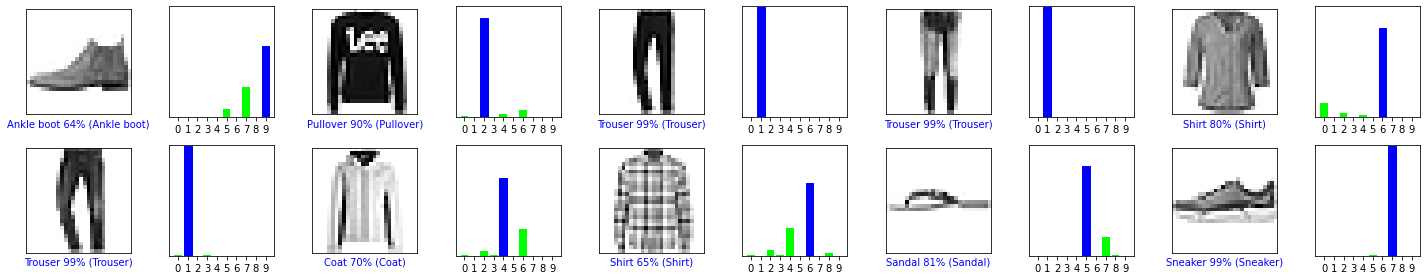

In [ ]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediccion31[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediccion31[i], test_labels)
plt.tight_layout()
plt.show()

Como hemos dicho antes, podemos corroborar que el modelo 3 ha mejorado bastante. Sigue teniendo fallos, pero se puede ver una mejoría bastante notable gracias al uso del optimizador 'adam'. La ventaja que tiene 'adam' sobre el resto de optimizadores, es que está construído en base a sus predecesores (AdaGrad y RMSProp), es decir, mantiene el factor de entrenamiento por parámetro y además calcula el error cuadrático medio de la propagación, por lo que cada factor de entrenamiento se ve afectado por la media del momento.